In [579]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pykep as pk

In [580]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


In [581]:
T_earth = 365.25
T_mars = 686.98
T_syn = 1/(1/T_earth-1/T_mars)
T_syn_y = T_syn/365.25
steps_in_one_syn_period = 30
year_step = T_syn_y/steps_in_one_syn_period

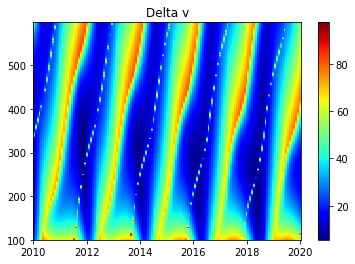

In [582]:

start_year_vector = np.arange(2010.,2020.1,year_step)
travel_time_vector = np.arange(100.,600.,1)

Delta_v_vec = []
travel_times = []
start_years = []
data = []
for start_year in start_year_vector:
    start_day = (start_year - 2000)*365.25
    new_Delta_v_vec = []
    new_travel_times = []
    new_start_years = []
    for travel_time in travel_time_vector:
        earth = pk.planet.jpl_lp('earth')
        mars  = pk.planet.jpl_lp('mars')
        
        r_e,v_e = earth.eph(start_day)
        r_m,v_m = mars.eph(start_day+travel_time)
        l = pk.lambert_problem(r1 = r_e, r2 = r_m, tof = travel_time*24.*3600., mu = pk.MU_SUN, max_revs = 0)
        Delta_v_1 = np.sqrt((l.get_v1()[0][0]-v_e[0])**2+(l.get_v1()[0][1]-v_e[1])**2+(l.get_v1()[0][2]-v_e[2])**2)
        Delta_v_2 = np.sqrt((l.get_v2()[0][0]-v_m[0])**2+(l.get_v2()[0][1]-v_m[1])**2+(l.get_v2()[0][2]-v_m[2])**2)
        Delta_v = (Delta_v_1+Delta_v_2)/1000
        
        new_Delta_v_vec.append(Delta_v)
        new_travel_times.append(travel_time)
        new_start_years.append(start_year)
        
        r_e,v_e = earth.eph(start_day-T_syn)
        r_m,v_m = mars.eph(start_day+travel_time-T_syn)
        s = pk.lambert_problem(r1 = r_e, r2 = r_m, tof = travel_time*24.*3600., mu = pk.MU_SUN, max_revs = 0)
        Delta_v_1 = np.sqrt((l.get_v1()[0][0]-v_e[0])**2+(l.get_v1()[0][1]-v_e[1])**2+(l.get_v1()[0][2]-v_e[2])**2)
        Delta_v_2 = np.sqrt((l.get_v2()[0][0]-v_m[0])**2+(l.get_v2()[0][1]-v_m[1])**2+(l.get_v2()[0][2]-v_m[2])**2)
        Delta_v_s = (Delta_v_1+Delta_v_2)/1000
        
        r_e,v_e = earth.eph(start_day-2*T_syn)
        r_m,v_m = mars.eph(start_day+travel_time-2*T_syn)
        s = pk.lambert_problem(r1 = r_e, r2 = r_m, tof = travel_time*24.*3600., mu = pk.MU_SUN, max_revs = 0)
        Delta_v_1 = np.sqrt((l.get_v1()[0][0]-v_e[0])**2+(l.get_v1()[0][1]-v_e[1])**2+(l.get_v1()[0][2]-v_e[2])**2)
        Delta_v_2 = np.sqrt((l.get_v2()[0][0]-v_m[0])**2+(l.get_v2()[0][1]-v_m[1])**2+(l.get_v2()[0][2]-v_m[2])**2)
        Delta_v_ss = (Delta_v_1+Delta_v_2)/1000
        
        r_e,v_e = earth.eph(start_day-3*T_syn)
        r_m,v_m = mars.eph(start_day+travel_time-3*T_syn)
        s = pk.lambert_problem(r1 = r_e, r2 = r_m, tof = travel_time*24.*3600., mu = pk.MU_SUN, max_revs = 0)
        Delta_v_1 = np.sqrt((l.get_v1()[0][0]-v_e[0])**2+(l.get_v1()[0][1]-v_e[1])**2+(l.get_v1()[0][2]-v_e[2])**2)
        Delta_v_2 = np.sqrt((l.get_v2()[0][0]-v_m[0])**2+(l.get_v2()[0][1]-v_m[1])**2+(l.get_v2()[0][2]-v_m[2])**2)
        Delta_v_sss = (Delta_v_1+Delta_v_2)/1000
        
        r_e,v_e = earth.eph(start_day-4*T_syn)
        r_m,v_m = mars.eph(start_day+travel_time-4*T_syn)
        s = pk.lambert_problem(r1 = r_e, r2 = r_m, tof = travel_time*24.*3600., mu = pk.MU_SUN, max_revs = 0)
        Delta_v_1 = np.sqrt((l.get_v1()[0][0]-v_e[0])**2+(l.get_v1()[0][1]-v_e[1])**2+(l.get_v1()[0][2]-v_e[2])**2)
        Delta_v_2 = np.sqrt((l.get_v2()[0][0]-v_m[0])**2+(l.get_v2()[0][1]-v_m[1])**2+(l.get_v2()[0][2]-v_m[2])**2)
        Delta_v_ssss = (Delta_v_1+Delta_v_2)/1000
        
        r_e,v_e = earth.eph(start_day-5*T_syn)
        r_m,v_m = mars.eph(start_day+travel_time-5*T_syn)
        s = pk.lambert_problem(r1 = r_e, r2 = r_m, tof = travel_time*24.*3600., mu = pk.MU_SUN, max_revs = 0)
        Delta_v_1 = np.sqrt((l.get_v1()[0][0]-v_e[0])**2+(l.get_v1()[0][1]-v_e[1])**2+(l.get_v1()[0][2]-v_e[2])**2)
        Delta_v_2 = np.sqrt((l.get_v2()[0][0]-v_m[0])**2+(l.get_v2()[0][1]-v_m[1])**2+(l.get_v2()[0][2]-v_m[2])**2)
        Delta_v_sssss = (Delta_v_1+Delta_v_2)/1000
        
        r_e,v_e = earth.eph(start_day-6*T_syn)
        r_m,v_m = mars.eph(start_day+travel_time-6*T_syn)
        s = pk.lambert_problem(r1 = r_e, r2 = r_m, tof = travel_time*24.*3600., mu = pk.MU_SUN, max_revs = 0)
        Delta_v_1 = np.sqrt((l.get_v1()[0][0]-v_e[0])**2+(l.get_v1()[0][1]-v_e[1])**2+(l.get_v1()[0][2]-v_e[2])**2)
        Delta_v_2 = np.sqrt((l.get_v2()[0][0]-v_m[0])**2+(l.get_v2()[0][1]-v_m[1])**2+(l.get_v2()[0][2]-v_m[2])**2)
        Delta_v_ssssss = (Delta_v_1+Delta_v_2)/1000
        
        data.append([start_year,travel_time,Delta_v_s,Delta_v_ss,Delta_v_sss,Delta_v_ssss,Delta_v_sssss,Delta_v_ssssss,Delta_v])
    Delta_v_vec.append(new_Delta_v_vec)
    travel_times.append(new_travel_times)
    start_years.append(new_start_years)

fig, axs = plt.subplots(1)

ax = axs
z_min, z_max = np.min(np.min(Delta_v_vec)), np.max(np.max(Delta_v_vec))
c = ax.pcolor(start_years, travel_times, Delta_v_vec, cmap='jet', vmin=z_min, vmax=z_max)
ax.set_title('Delta v')
fig.colorbar(c, ax=ax)

In [583]:
print(np.size(start_years))

71000


In [584]:
datadf = np.array(data)
pdata = pd.DataFrame({'start':datadf[:,0],'duration':datadf[:,1],'delta_s':datadf[:,2],'delta_ss':datadf[:,3],'delta_sss':datadf[:,4],'delta_ssss':datadf[:,5],'delta_sssss':datadf[:,6],'delta_ssssss':datadf[:,7],'delta':datadf[:,8]})
train_dataset = pdata.sample(frac=0.8, random_state=0)
test_dataset = pdata.drop(train_dataset.index)
train_labels = train_dataset.pop('delta')
test_labels = test_dataset.pop('delta')
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
start,56800.0,2015.022888,2.916287,2010.000000,2012.491147,2015.053469,2017.544616,2020.035763
duration,56800.0,349.504701,144.321809,100.000000,225.000000,349.000000,475.000000,599.000000
delta_s,56800.0,51.319034,13.169219,15.313776,42.581929,49.194496,57.805589,107.466297
delta_ss,56800.0,77.956303,13.593201,30.999302,70.072637,79.323152,86.539613,113.099995
delta_sss,56800.0,96.451897,11.464470,51.089880,90.478058,99.629842,104.659734,127.237494
delta_ssss,56800.0,98.405066,11.425064,55.215265,91.919561,102.041497,106.315505,132.432490
delta_sssss,56800.0,83.401788,13.422241,21.169953,78.239149,86.406445,91.935401,116.721421
delta_ssssss,56800.0,55.739983,14.069240,4.056070,51.000789,60.142558,64.684570,90.934240


In [585]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_dataset = norm(train_dataset)
normed_test_dataset = norm(test_dataset)

In [586]:
def build_model():
    model = keras.Sequential([
        layers.Dense(40, activation='selu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(100, activation='selu'),
        layers.Dense(40, activation='selu'),
        layers.Dense(1)
    ])

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])
    return model

In [587]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 40)                360       
_________________________________________________________________
dense_68 (Dense)             (None, 100)               4100      
_________________________________________________________________
dense_69 (Dense)             (None, 40)                4040      
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 41        
Total params: 8,541
Trainable params: 8,541
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(normed_train_dataset, train_labels, validation_split=0.2, epochs=100)

Train on 45440 samples, validate on 11360 samples
Epoch 1/100
45440/45440 [==============================] - 10s 220us/sample - loss: 91.8828 - acc: 0.0000e+00 - val_loss: 8.6570 - val_acc: 0.0000e+00
Epoch 2/100
45440/45440 [==============================] - 6s 140us/sample - loss: 5.3822 - acc: 0.0000e+00 - val_loss: 2.9453 - val_acc: 0.0000e+00
Epoch 3/100
45440/45440 [==============================] - 6s 138us/sample - loss: 2.4085 - acc: 0.0000e+00 - val_loss: 2.4585 - val_acc: 0.0000e+00
Epoch 4/100
45440/45440 [==============================] - 7s 152us/sample - loss: 1.5631 - acc: 0.0000e+00 - val_loss: 1.3948 - val_acc: 0.0000e+00
Epoch 5/100
45440/45440 [==============================] - 6s 138us/sample - loss: 1.1550 - acc: 0.0000e+00 - val_loss: 0.8140 - val_acc: 0.0000e+00
Epoch 6/100
45440/45440 [==============================] - 6s 139us/sample - loss: 0.8796 - acc: 0.0000e+00 - val_loss: 0.7237 - val_acc: 0.0000e+00
Epoch 7/100
45440/45440 [=============================

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

In [ ]:
print(normed_test_dataset)
test_predictions = model.predict(normed_test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim([0,100])
plt.ylim([0,100])
_ = plt.plot([0,100], [0,100])

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [ ]:
print(np.size(np.arange(2010.,2020.1,year_step)))
print(np.size(np.arange(100.,600.,1)))
print(np.size(data)/9)
print(101*500)
print(data[-1])
print(data[-np.size(np.arange(100.,600.,1))*steps_in_one_syn_period-1])
print(data[-np.size(np.arange(100.,600.,1))*steps_in_one_syn_period][1])
print(np.size(travel_time_vector))
print(np.size(range(0,np.size(travel_time_vector)-1)))

In [ ]:
for i in range (1,2):
    for j in range (1,60):
        start_year = data[-1][0]+year_step
        #start_day = (start_year - 2000)*365.25
        new_Delta_v_vec = []
        new_travel_times = []
        new_start_years = []
        for i in range (0,np.size(travel_time_vector)):
            travel_time = data[-np.size(np.arange(100.,600.,1))*steps_in_one_syn_period][1]
            Delta_v_s = data[-np.size(np.arange(100.,600.,1))*steps_in_one_syn_period][8]
            Delta_v_ss = data[-np.size(np.arange(100.,600.,1))*steps_in_one_syn_period][2]
            Delta_v_sss = data[-np.size(np.arange(100.,600.,1))*steps_in_one_syn_period][3]
            Delta_v_ssss = data[-np.size(np.arange(100.,600.,1))*steps_in_one_syn_period][4]
            Delta_v_sssss = data[-np.size(np.arange(100.,600.,1))*steps_in_one_syn_period][5]
            Delta_v_ssssss = data[-np.size(np.arange(100.,600.,1))*steps_in_one_syn_period][6]
            no = norm([start_year,travel_time,Delta_v_s,Delta_v_ss,Delta_v_sss,Delta_v_ssss,Delta_v_sssss,Delta_v_ssssss])
            input_for_new_prediction = pd.DataFrame({'start_year':[no[0]],'travel_time':[no[1]],'Delta_v_s':[no[2]],'Delta_v_ss':[no[3]],'Delta_v_sss':[no[4]],'Delta_v_ssss':[no[5]],'Delta_v_sssss':[no[6]],'Delta_v_ssssss':[no[7]]})
            prediction = model.predict(input_for_new_prediction)[0,0]
            data = np.append(data,[[start_year,travel_time,Delta_v_s,Delta_v_ss,Delta_v_sss,Delta_v_ssss,Delta_v_sssss,Delta_v_ssssss,prediction]],axis=0)
            new_Delta_v_vec.append(prediction)
            new_travel_times.append(travel_time)
            new_start_years.append(start_year)
        Delta_v_vec.append(new_Delta_v_vec)
        travel_times.append(new_travel_times)
        start_years.append(new_start_years)

In [ ]:
fig, axs = plt.subplots(1)

ax = axs
z_min, z_max = np.min(np.min(Delta_v_vec)), np.max(np.max(Delta_v_vec))
d = ax.pcolor(start_years, travel_times, Delta_v_vec, cmap='jet', vmin=z_min, vmax=z_max)
ax.set_title('Delta v')
fig.colorbar(d, ax=ax)